In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import csv
import copy
import sklearn.linear_model
from sklearn import preprocessing
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
COLOR_TREAT = "#2ecc71"
COLOR_NO_TREAT = "#e74c3c"

## Naïve analysis of the peace agreement dataset :
- agreement features
- agreement's success features

** PAID** Peace Agreement ID

**Region**
The regional variable specifies the regional location of the conflict:
1. Europe: Geographic definition, including the states in the Caucasus. (COW numbers 200–395) 
2. Middle East: Egypt, Iran, Iraq, Israel, Jordan, Kuwait, Lebanon, Syria, Turkey, and the states of the Arabian Peninsula (COW numbers 630–698)
3. Asia: Geographic definition, including Oceania, Australia, and New Zealand, and excluding states in the Middle East. (COW numbers 700–990)
4. Africa: Geographic definition, excluding states in the Middle East (eg. Egypt). (COW numbers 400– 625)
5. Americas: Geographic definition, including states in the Caribbean. (COW numbers 2–165)

**GWNO** Gleditsch & Ward System Membership Table

**CID** - Conflict ID

In [ ]:
pa = pd.read_excel('data/ucdp-peace-agreements.xls')

In [ ]:
pa.iloc[:10, :11]

In [ ]:
# ended - Agreement ended:
pa.iloc[:10, 9:20]

In [ ]:
regiondic = {
    1:'Europe',
    2:'Middle East',
    3:'Asia',
    4:'Africa',
    5:'Americas'
}

## Distribution of the agreements by region

In [ ]:
sns.countplot(x='Region', data=pa)
plt.title('Agreement counts per region')
plt.xlabel('Region');
plt.xticks(range(5), ['europe', 'middle east', 'Asia', 'Africa', 'Americas']);

This plot shows the number of peace agreements per region. We can see that most agreements concern Africa.

## Distribution of agreements by year

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='Year', data=pa)

## UN involvment in the PAs

In [ ]:
pa_UN = pa[pa['pa_3rd'].astype(str).str.contains('UN')]
pa_UN

In [ ]:
pa["UN"] = [1 if ele in pa_UN['CID'].unique() else 0 for ele in pa.CID]
pa['Region'].replace(regiondic , inplace = True)
cols = ['bwdID', 'pa_comment', 'c_sign', 'c_3rd', 'c_duration', 'Reaffirm ID', 'Comment', 'txt', 
        'Link to fulltext agreement', 'ProcID', 'Frame', 'All', 'Counter' , 'Duration']
pa.drop(columns=cols, inplace=True)


pa.head(10)

In [ ]:
to_be_categorical = ['termdur' , 'noconf11' , 'CoVi01' ,'DyVi05' ]
for categ in to_be_categorical:
    pa[categ] = pd.Categorical(pa[categ] , pa[categ].unique())

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='CID', data= pa_UN, hue='ended', order=pa_UN.CID.value_counts().index)

## Analysis of the Conflict ID variable

In [ ]:
print('Number of conflicts treated in this dataset : %s' %(len(pa.CID.unique())))

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='CID', data=pa, order=pa.CID.value_counts().index)

This plot shows that approximtely half of the conflicts were solved with one agreement. We wil split the rest of the exploration into two groups, the ones solved in one agreements and one grouping all the others.

In [ ]:
cc = pa.groupby(['CID', 'ended']).count()
plt.figure(figsize=(25,10))
sns.countplot(x='CID', data= pa, hue='DyVi05', order=pa.CID.value_counts().index)

Most conflicts ended with agreements that are still valid today. 
All agreements of the conflicts (179, 128, 177, 101, 216 205, 185) were terminated. 1 represents a PA that was terminated, 0 its success.


## Analysis of the conflicts that could not be ended by the peace agreements

In [ ]:
pa_128 = pa.loc[pa['CID'] == 128]
#pa_128.to_csv('Unsolved_CID128.csv')

**Conflict 128 :**

Conflict between Iran and Iraq. Each of the 12 agreements were signed in 1975. Despite the first agreements, that was signed by The Shah of Iran and Saddam Hussein, all of them were signed by the same two representatives of Iran and Iraq, respectively by ABBAS-ALI KHALATBARY, Minister for Foreign Affairs of Iran and SAADOUN HAMADI, Minister for Foreign Affairs of Iraq. 
These agreements that were active in 1975, were than terminated between 1975 and 1980 until they were reactivated. Although the agreements were reactivated in 1980. Conflicts between Iran and Iraq did not stop in 1980, hence we can consider those agrrements as failures.

In [ ]:
pa_179 = pa.loc[pa['CID'] == 179]
#pa_179.to_csv('Unsolved_CID179.csv')

**Conflict 179 :**

This conflict concerned the Government of the Republic of Rwanda and the Rwandese Patriotic Front. The six agreements were signed between 1992 and 1993. The incompatibility is governmental.
The five first agreements were signed to provide partial peace and the last one in august 1993 was supposed to prvide full peace to the region. None of the agreements provided for the holding of national talks to solve incompatibility and for the integration of rebels into civil service.
In April 1994, a genocide broke out and the peace agreements were never fully implemented.

**Conflict 101 : **

This conflict originated from a governmental incompatibility between South Africa and Namibia. The agreement was signed in 1978 and lasted two months. The agreement contained provisions for political incompatibilities leading to independence for Namibia, justice provisions with the return of refugees and release of political prisoners and behavior regulations such as (ceasefire, withdrawal of foreign forces and demobilisation of local armies).
 
**Conflict 216 : **

Government of Guinea Bissau - Military Junta for the Consolidation of Democracy, Peace and Justice. Incompatibility 2, The peace agreement lasted for 6 months.

** Conflict 205 : **

The agreement covered indigenous rights and culture and strengthened the position of the indigenous people in Mexico. incompatibility 2. The accord was never implemented and thus further peace talks that were planned in September the same year were suspended by EZLN. No exact date for the ending of the peace accord has been found.

All of the conflicts that were treated by only one agreement and had terminated originated from governmental imcompabilities. 

In [ ]:
pa.loc[pa['CID'] == 186]
#pa.iloc[77,:].to_csv('Unsolved_CID101.csv')
#pa_179.to_csv('Unsolved_CID179.csv')

## Analyze conflicts solved in one agreements that are still valid as of 2011


In [ ]:
idx = pa['CID'].value_counts()
idx_1 = idx[idx.values == 1]
idx_1.index

In [ ]:
indx_1_ended = []
for ind in idx_1.index:
    #print(ind)
    a = pa.ended[pa['CID'] == ind]
    if a.iloc[0] == 0: # ended is the column 17 
        indx_1_ended.append(a.index)
    
pa_one = pa.iloc[np.array(indx_1_ended)[:,0], :]
pa_one.head()
#pa_one[pa_one.ended == 0]
#pa_one['ended'])

In [ ]:
pa_1behavior = pa_one.iloc[:, 20:25]
pa_1behavior['combination'] = pa_1behavior.apply(whatcombi, axis=1)
sns.countplot(x='combination', data=pa_1behavior)

In [ ]:
lst = [list(i) for i in itertools.product([0, 1], repeat=5)]
print(lst[29])

8 successfull agreements established peace in providing for a ceasefire

3 provided for the withdrawal of foreign forces and 3 others provided for a ceasefire, the integration of rebels into the army and the disarmement of the warring parties.


In [ ]:
#pa_1incompatibility = pa.iloc[:, 25:43]
#pa_1incompatibility['combination'] = pa_1incompatibility.apply(whatcombi, axis=1)
#pa_1incompatibility.to_csv('pa_1PA_success.csv')
pa_1incompatibility = pd.read_csv('pa_1PA_success.csv')
#pa_1incompatibility['inc'] = pa.iloc[np.array(indx_1_ended)[:,0], 8]

In [ ]:
a = copy.deepcopy(pa_1incompatibility.groupby('combination').count().pp)
a.sort_values(ascending=False, inplace=True)

In [ ]:
plt.figure(figsize=(20,10))
a[:20].plot('bar', rot=45)
#sns.countplot(x='combination', data=pa_1incompatibility, order=pa_1incompatibility.combination.value_counts().index)

TODO :

## Whatcombi : function to be ran for each new number of possible combinations 

In [ ]:
def whatcombi(pa):
    # returns the corresponding combination number of the dataset
    # set : n and rerun box in fct of the number of binary features to be analyzed
    n = 5
    lst = [list(i) for i in itertools.product([0, 1], repeat=n)]
    for i in range(len(lst)):
        a = pa == lst[i]
        # if all values in a are true, it is the good combination
        if all(x for x in a.values):
            return(i)

## Analysis of the agreements termination consistency in the variables :

- **ended** 
    - 0) if the agreements still holds
    - 1) if the agreement terminated
    
- **DyVi05** 
    - 1) the dyad violence restarted or continued
    - 0) the violence ended in this dyad
    - -99) Not applicable, agreement signed previous year

In [ ]:
pa_result = pa.loc[:, ['ended', 'DyVi05']]
pa_result.head()

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(x='DyVi05', data=pa)
plt.subplot(122)
sns.countplot(x='ended', data=pa)

Thoses plots show that approximately 140 agreements ended there corresponding conflict. This information should be crossed with the number of conflicts treated in this dataset as there are only 60 unique conflicts.

In [ ]:
pa_result['combination'] = pa_result.apply(whatcombi, axis=1)

In [ ]:
sns.countplot(x='combination', data=pa_result)

Approximately 160 out of 216 (74%) agreements have the same values for the *ended* and *DyVi05* variables. Hence we can say that those variables are consistent.

## Behaviour variables analysis

In [ ]:
pa_behavior = pa.iloc[:, 20:25]
# how to analyze a set of binary features ?
pa_behavior.head()
#sns.pairplot(pa_behavior)

In [ ]:
# run only once
pa_behavior['combination'] = pa_behavior.apply(whatcombi, axis=1)

In [ ]:
sns.countplot(x='combination', data=pa_behavior)

In [ ]:
lst = [list(i) for i in itertools.product([0, 1], repeat=5)]
print(lst[11])

1. Most agreements do not treat behavioral instructions
2. The second most recurrent combination concerns agreements that provided a ceasefire
3. third most recurrent :  ceasefire, withdrawal of foreign forces
4. fourth : ceasefire, integration in national army, disarmement of warring parties

In [ ]:
pa_behavior['ended'] = pa['ended']
sns.countplot(x='combination', data= pa_behavior, hue='ended')

There are no much difference in agreements that terminate or not. However Two kinds of agreements were never terminated. The ones which provided for the creation of a new national army or the integration of rebels into the army and the withdrawal of foreign forces.

## Incompatibility variables analysis
### Government incompatibilities

In [ ]:
pa_incompatibility_gov = pa.iloc[:, 25:33]
# study ended results in fct of all combinations of the binary features
pa_incompatibility_gov.head()

In [ ]:
pa_incompatibility_gov['combination'] = pa_incompatibility_gov.apply(whatcombi, axis=1)

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='combination', data=pa_incompatibility_gov)
plt.yscale('log')

In [ ]:
lst = [list(i) for i in itertools.product([0, 1], repeat=8)]
print(lst[25])

While most agreements do not deal with governmental incompatibilities, the ones that do mostly provide for elections and electoral reforms for rebel integration into the interim government.

The *Pol_prov* feature could be used to generalize the inclusion of political provisions in the agreement

## Justice variables analysis

In [ ]:
pa_justice = pa.iloc[:, 43:48]
# study ended results in fct of all combinations of the binary features
pa_justice.head()

In [ ]:
# run only once
pa_justice['combination'] = pa_justice.apply(whatcombi, axis=1)

In [ ]:
sns.countplot(x='combination', data=pa_justice)

In [ ]:
lst = [list(i) for i in itertools.product([0, 1], repeat=5)]
print(lst[9])

- The most recurring combination is the one where no justice issues is treated in the agreement.
- The second most recurring is the one where the agreement provided a release of prisoners

The last features is set to one if any of the justice provisions was applied in the agreement. This variable could be of good use to reduce the number of features and keep an insight of the rather or not 'Justice' issues treated in the agreement.

## Implementation variables analysis

In [ ]:
pa_implementation = pa.iloc[:, 48:53]
pa_implementation.drop(columns='Reaffirm ID', inplace=True)
# study ended results in fct of all combinations of the binary features
pa_implementation.head()

In [ ]:
# run only once
pa_implementation['combination'] = pa_implementation.apply(whatcombi, axis=1)

In [ ]:
sns.countplot(x='combination', data=pa_implementation)

- The most recurring implementation is the one where the agreement did not reaffirm earlier agreements, did not outline a negotiating agenda including negotiations on the incompatibility, did not provide for the deployment of a peace-keeping operation and did not provide for the establishment of a commission or committee to oversee implementation of the agreement.

- Second most recurring ... did not everything but did provide for the establishment of a commission or committee to oversee implementation of the agreement.

- Third most recurring, nothing but did outline a negotiating agenda including negotiations on the incompatibility

- Fourth : reaffirm earlier agreements and provided the establishment of a commission or committee to oversee implementation of the agreement.


display countplot type agreement

In [ ]:
sns.pairplot(pa)

## Temination variables analysis
- **DyVi05** - Violence with the same parties restarted within 5 years

    - 1) Yes, the dyad violence restarted or continued
    - 0) No, the violence ended in this dyad
    - -99) Not applicable, agreement signed previous year


- **CoVi01** - Terminated the whole conflict the following year, signed an active year
    - 2) Part of a peace process which ended the violence.
    - 1) Yes, the conflict was terminated
    - 0) No, the conflict continued
    - -99) Not applicable, for example, the peace agreement was not signed in a conflict active year.


- **noconf** - Signed in a conflict inactive year.

The peace agreement was signed in an inactive conflict year i.e. in a year with less than 25 battle- related deaths recorded by the UCDP.
    - 1) Yes 
    - 0) No

- **termdur** - Number of years since last activity.

The number of inactive years between end of conflict and signature of the peace agreement.


- **Noconf11** - Still terminated as of 2011
    No active conflict years recorded from agreement until 2011 1) Yes, no active conflict years from agreement til 2011, 
    - 0) No, conflict restarted before 2011
    - -99) Not applicable, signed in 2011
    
The *termdur* will be used to relate agreement signed on active years to ones signed on inactive year. This should allow us to give more strentgh to an agreement that was signed fewer years after the end of the conflict than one signed a long time after. 

The *DyVi05* feature will be used as the second success evaluation variable. The *CoVi01* feature will be used to evaluate the time efficiency of the agreement.

In [ ]:
pa_termination = pa.iloc[:, 53:58]
# study ended results in fct of all combinations of the binary features
pa_termination.head()

In [ ]:
pa_one = pa[pa['CID'] == [x for x in pa.CID.value_counts().index]]

In [ ]:
import copy
idx = (pa.CID.value_counts()==1)
pa_one = copy.deepcopy(pa)
for i in range(len(idx)):
    if idx.values[i] == False:
        pa_one.drop(index=[pa_one['CID'] == idx.index[i]])

In [ ]:
cc = pa.groupby(['CID', 'ended']).count()
plt.figure(figsize=(20,10))
sns.countplot(x='CID', data= pa, hue='ended')

# Check propensity scores

In [ ]:
pa.iloc[:, 13:-1]

In [ ]:
pa.sort_values('UN' , inplace = True)
pa

In [ ]:
import sklearn.linear_model
import sklearn.preprocessing
#removing the useless features
pa_reg = pa.iloc[:, 13:-1]
#prepocess by standardizing the dataset
pa_reg = preprocessing.scale(pa_reg)
#Perform a logistic regression in order to get the propensity score for each individuals
model = sklearn.linear_model.LogisticRegression()
model.fit(pa_reg, pa.UN)
pred = model.predict_proba(pa_reg)

In [ ]:
pa.pred.isnull().values.any()

In [ ]:
sum(model.predict(pa_reg) == pa.UN)/len(pa_reg)

In [ ]:
plt.figure(figsize=(15, 10))
pa['pred'] = pred[:,1]
ax = sns.stripplot(x='PAID', y='pred', hue='UN', data=pa, palette={0:"#e74c3c", 1: "#2ecc71"})
ax.set(xticklabels=[], ylabel='Treatment (prediction)')
plt.title('Propensity score per agreement')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=ax.get_legend_handles_labels()[0], labels=['Without', 'With'], title='Treatment (ground truth)')

In [ ]:
import networkx as nx
from networkx.algorithms import bipartite

#create the nodes
G=nx.Graph()
G.add_nodes_from(pa['PAID'][pa.UN == 0])
G.add_nodes_from(pa['PAID'][pa.UN == 1])

In [ ]:
#Bipartite complete graph
for ID_u, score_u in zip(pa.PAID[pa.UN == 0], pa.pred[pa.UN == 0]):
    for ID_v, score_v in zip(pa.PAID[pa.UN == 1], pa.pred[pa.UN == 1]):
        G.add_edge(ID_u, ID_v, weight=-abs(score_u-score_v))

In [ ]:
#Let's check if the number of nodes and edges is right
#Number of nodes should be 185+429 = 614 (the graph is bipartite) and number of edges should be 185*429 = 79365
#because it is complete bipartite
print(G.number_of_nodes())
print(G.number_of_edges())

In [ ]:
from networkx.algorithms import max_weight_matching
matching = max_weight_matching(G, maxcardinality=True)

In [ ]:
len(list(res.items()))

In [ ]:
pa_UN = pa[pa['UN'] == 1]
pa_UN['temp'] = 1
pa_UN = pa_UN[['PAID' , 'pred' , 'temp']]
pa_nUN = pa[pa['UN'] == 0]
pa_nUN['temp'] = 1
pa_nUN = pa_nUN[['PAID' , 'pred' , 'temp']]


#We merge the two datasets thanks to the temp column, this new merged dataset mimics the complete bipartite graph:
result = pd.merge(pa_nUN ,pa_UN , on='temp', how='left')
result = result[['PAID_x' , 'PAID_y' , 'pred_x' , 'pred_y']]
result['diff'] = abs(result['pred_x'] - result['pred_y'])
result = result.set_index(['PAID_x', 'PAID_y'])
result['diff'].isnull().values.any()
#result
result.loc[list(matching.items())].dropna()

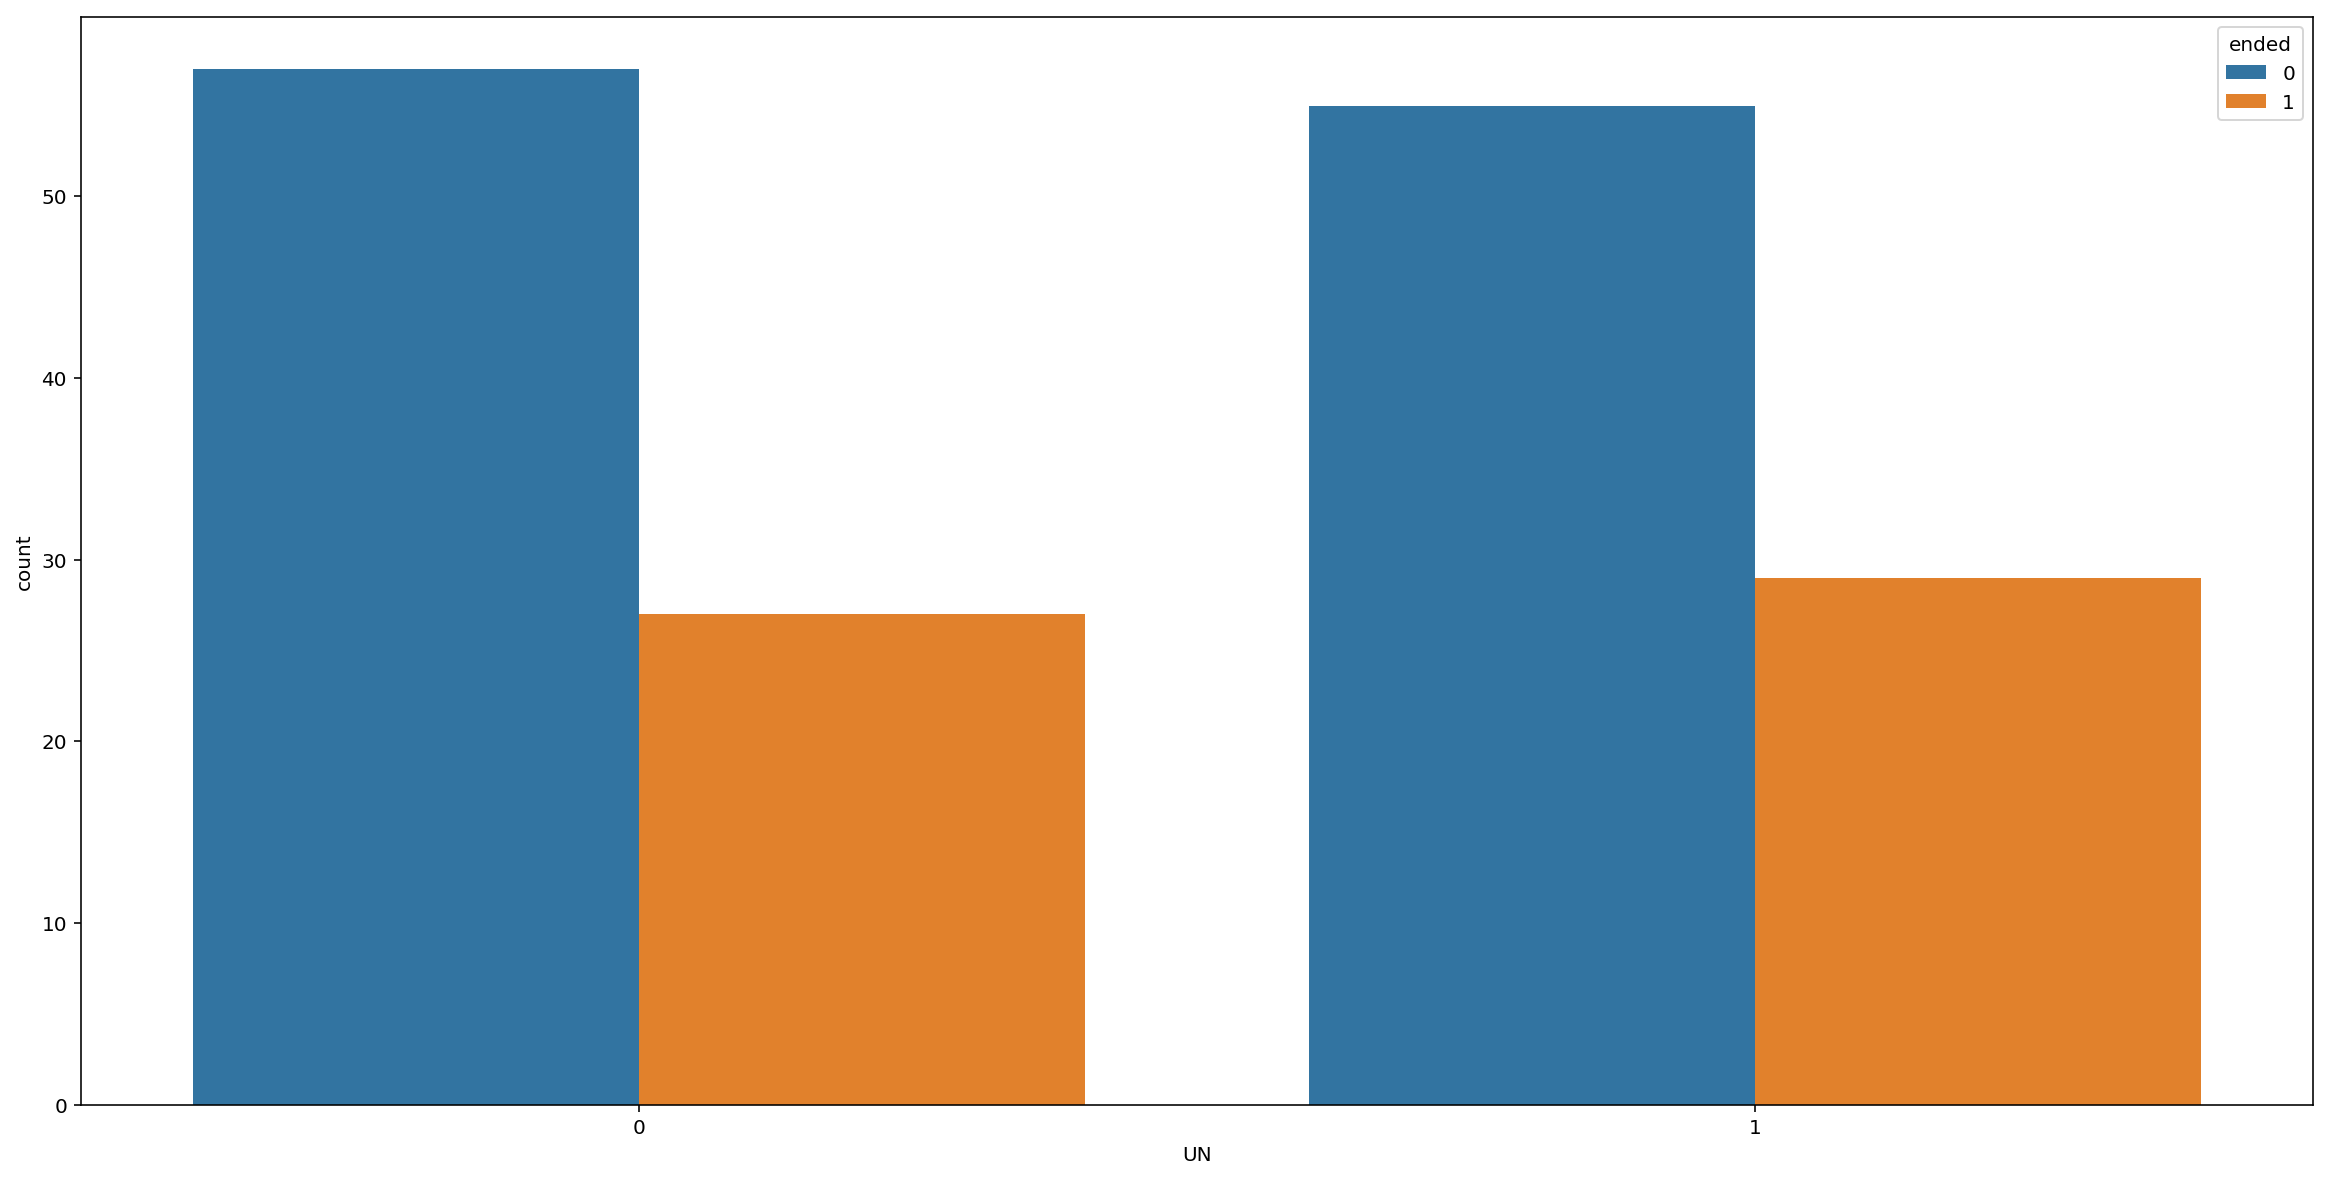

In [323]:
paID = pa.set_index('PAID')
matched = paID.loc[list(matching.keys())]
plt.figure(figsize=(20,10))
sns.countplot(x='UN', data= matched, hue='ended')

# Conflicts

In [ ]:
pa = pd.read_excel('data/ucdp-peace-agreements.xls')

reader = csv.reader(open('data/translate_conf.csv', 'r'))
d = {}
for row in reader:
    k, v = row
    d[v] = k
    
pa.CID = pa.CID.astype(dtype=str).replace(to_replace=d )
pa.CID = pa.CID.astype(dtype = int)

In [ ]:
df = pd.read_csv('data/ucdp-prio-acd-171.csv')

In [ ]:
df.iloc[:10, :11]

In [ ]:
df.iloc[:10, 11:27]

In [ ]:
df.drop(['sidea2nd', 'sideb2nd' , 'terr' , 'year' , 'intensity' , 'startprec' , 'startdate2' , 'epend' , 'ependprec', 'gwnoa', 'gwnoa2nd', 'gwnob', 'gwnob2nd', 'gwnoloc', 'startprec2', 'version'], axis=1, inplace = True)

In [ ]:
print('Number of unique conflicts in this dataset : %s' %(len(df.conflictid.unique())))

In [ ]:
clean_df = df.groupby('conflictid').last()

In [ ]:
clean_df

In [ ]:
agreements = pa.groupby('CID').last()
agreements.index

In [ ]:
clean_df["agreement"] = [1 if ele in agreements.index else 0 for ele in clean_df.index]
clean_df.rename({'ependdate':'enddate'} , inplace = True, axis = 1)

In [ ]:
clean_df

In [ ]:
print("Number of non-unique 'side b' for a single conflict: %d" %len(df['conflictid'].unique()[(df.groupby(df['conflictid'])['side b'].unique().apply(len) > 1)]))
#df.groupby(df['conflictid'])['side b'].unique()[df.groupby(df['conflictid'])['side b'].unique().apply(len) > 1]
print("Number of non-unique locations for a single conflict: %d" %len(df['conflictid'].unique()[(df.groupby(df['conflictid'])['location'].unique().apply(len) > 1)]))
print("Number of non-unique 'side a' for a single conflict: %d" %len(df['conflictid'].unique()[(df.groupby(df['conflictid'])['sidea'].unique().apply(len) > 1)]))
print("Number of non-unique startdates for a single conflict: %d" %len(df['conflictid'].unique()[(df.groupby(df['conflictid'])['startdate'].unique().apply(len) > 1)]))
print("Number of non-unique types for a single conflict: %d" %len(df['conflictid'].unique()[(df.groupby(df['conflictid'])['type'].unique().apply(len) > 1)]))
print("Number of non-unique regions for a single conflict: %d" %len(df['conflictid'].unique()[(df.groupby(df['conflictid'])['region'].unique().apply(len) > 1)]))

In [ ]:
def plot_distrib(s1, s2, title, xLabel, yLabel, ax=None):
    bins = np.histogram(s1)[1]
    sns.distplot(s1, kde=False, color=COLOR_NO_TREAT, norm_hist=True, ax=ax, bins=bins)
    sns.distplot(s2, kde=False, color=COLOR_TREAT, norm_hist=True, ax=ax, bins=bins)
    if ax is None:
        plt.title(title)
        plt.xlabel(xLabel)
        plt.ylabel(yLabel)
        plt.legend(['No agreement', 'Agreement'])
    else:
        ax.set_title(title)
        ax.set_xlabel(xLabel)
        ax.set_ylabel(yLabel)
        ax.legend(['No agreement', 'Agreement'])

In [ ]:
#f, axarr = plt.subplots(4, 1, figsize=(15, 18))
#for index, feature in enumerate(['incomp', 'cumint', 'type', 'region']):
    #ax = axarr[int(index/4)]#[index%3]
plt.figure(figsize=(12,5))
plot_distrib(s1=clean_df['incomp'][clean_df['agreement'] == 0], s2=clean_df['incomp'][clean_df['agreement'] == 1], title='incomp', xLabel = 'incomp', yLabel='Density', ax=None)

In [ ]:
plt.figure(figsize=(12,5))
plot_distrib(s1=clean_df['cumint'][clean_df['agreement'] == 0], s2=clean_df['cumint'][clean_df['agreement'] == 1], title='cumint', xLabel = 'cumint', yLabel='Density', ax=None)

In [ ]:
plt.figure(figsize=(12,5))
plot_distrib(s1=clean_df['type'][clean_df['agreement'] == 0], s2=clean_df['type'][clean_df['agreement'] == 1], title='type', xLabel = 'type', yLabel='Density', ax=None)

In [ ]:
locationNAcount = clean_df[clean_df['agreement'] == 0].groupby('location').count()['sidea']
locationNAcount = locationNAcount / len(clean_df[clean_df['agreement'] == 0])
locationNAcount.sort_values(ascending = False , inplace = True)
plt.figure(figsize=(12,5))
locationNAcount[:20].plot('bar')

In [ ]:
locationcount = clean_df[clean_df['agreement'] == 1].groupby('location').count()['sidea']
locationcount = locationcount / len(clean_df[clean_df['agreement'] == 1])
locationcount.sort_values(ascending = False , inplace = True)
plt.figure(figsize=(12,5))
locationcount[:20].plot('bar')

In [ ]:
regionNAcount = clean_df[clean_df['agreement'] == 0].groupby('region').count()['sidea']
regionNAcount = regionNAcount / len(clean_df[clean_df['agreement'] == 0])
regionNAcount.sort_values(ascending = False , inplace = True)
plt.figure(figsize=(12,5))
regionNAcount.plot('bar')

In [ ]:
regioncount = clean_df[clean_df['agreement'] == 1].groupby('region').count()['sidea']
regioncount = regioncount / len(clean_df[clean_df['agreement'] == 1])
regioncount.sort_values(ascending = False , inplace = True)
plt.figure(figsize=(12,5))
regioncount.plot('bar')

In [ ]:
clean_df[clean_df['agreement'] == 1].shape

In [ ]:
clean_df

In [ ]:
clean_df['startdate'] = pd.to_datetime(clean_df['startdate'])
clean_df['enddate'] = pd.to_datetime(clean_df['enddate'])
clean_df['duration'] = (clean_df['enddate'] - clean_df['startdate']).dt.days
clean_df['duration'].fillna(0 , inplace = True)

In [ ]:
clean_df['duration'][clean_df['agreement'] == 0]

In [ ]:
plt.figure(figsize=(12,5))
plot_distrib(s1=clean_df['duration'][clean_df['agreement'] == 0], s2=clean_df['duration'][clean_df['agreement'] == 1], title='duration', xLabel = 'duration', yLabel='Density', ax=None)